In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
customers = pd.read_csv(r"C:\Users\Ayushi singh\Downloads\Untitled Folder\Customers.csv")
transactions = pd.read_csv(r"C:\Users\Ayushi singh\Downloads\Untitled Folder\Transactions.csv")
data = transactions.merge(customers, on="CustomerID")

In [34]:
customer_profiles = data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "TransactionID": "count"  # Total transactions
}).reset_index()
customer_profiles.rename(columns={
    "TotalValue": "TotalSpent",
    "TransactionID": "TransactionCount"
}, inplace=True)
scaler = MinMaxScaler()
customer_features = scaler.fit_transform(customer_profiles[["TotalSpent", "TransactionCount"]])

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

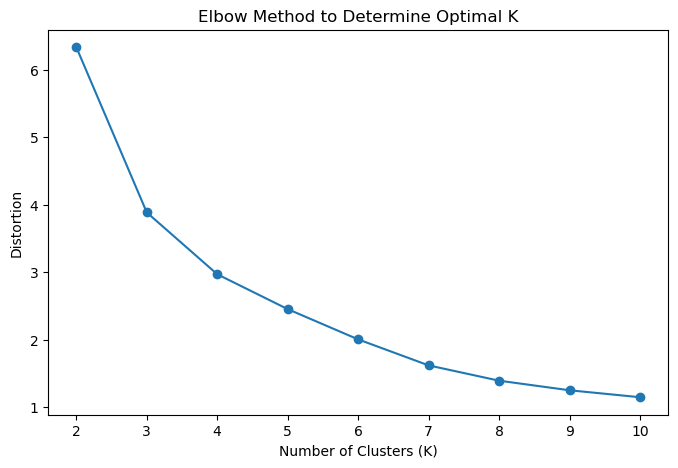

In [35]:
distortions = []
K = range(2, 11)  # Test clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(customer_features)
    distortions.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion")
plt.show()

In [36]:
optimal_k = 3  # Replace with the optimal K based on Elbow Method
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
customer_profiles["ClusterID"] = kmeans.fit_predict(customer_features)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
db_index = davies_bouldin_score(customer_features, customer_profiles["ClusterID"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7520285743713341


In [38]:
silhouette = silhouette_score(customer_features, customer_profiles["ClusterID"])
print(f"Silhouette Score (Optional): {silhouette}")

Silhouette Score (Optional): 0.4340676120130758


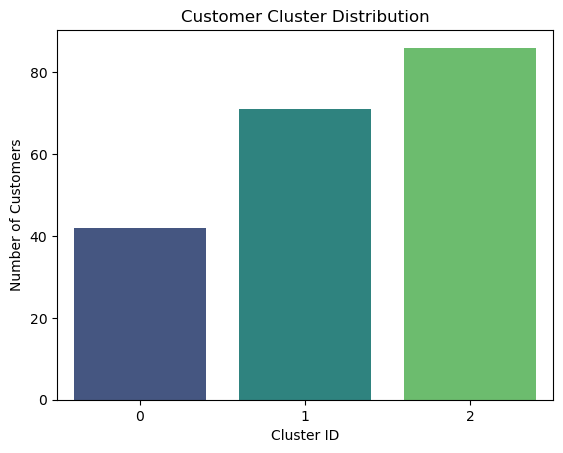

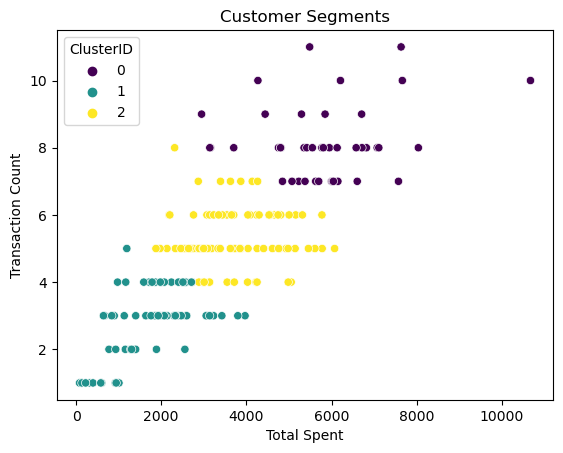

In [39]:
sns.countplot(x=customer_profiles["ClusterID"], palette="viridis")
plt.title("Customer Cluster Distribution")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Customers")
plt.show()

# Scatter plot for clusters
sns.scatterplot(
    x=customer_profiles["TotalSpent"],
    y=customer_profiles["TransactionCount"],
    hue=customer_profiles["ClusterID"],
    palette="viridis"
)
plt.title("Customer Segments")
plt.xlabel("Total Spent")
plt.ylabel("Transaction Count")
plt.show()